In [1]:
import matplotlib.pyplot as plt
import numpy as np
import torch

C:\Users\13755\AppData\Local\Programs\Python\Python39\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
def NormalizeData(data):
    return (data - np.min(data)) / (np.max(data) - np.min(data))

In [3]:
import random
# Set random seeds
torch.manual_seed(2)
np.random.seed(2)
random.seed(2)

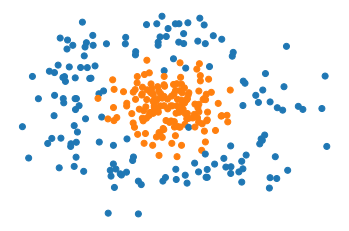

2.3328077374088387
1.939034401189828
(1000, 2)
torch.Size([1000])
torch.int64


In [4]:
# data processing
from sklearn.datasets import make_circles
from sklearn.datasets import make_moons

total_sample = 1000
train_sample = 300

X, y = make_circles(n_samples=total_sample, shuffle=True, noise=0.25, random_state=None, factor=0)
# rescale X
X = NormalizeData(X) * np.pi
y = torch.tensor(y)

# blue for 1, orange for 0
c = ["#1f77b4" if y_ == 0 else "#ff7f0e" for y_ in y]  # colours for each class
# c = [1 if y_ == 0 else 0 for y_ in y]  # colours for each class
plt.axis("off")
plt.scatter(X[:train_sample, 0], X[:train_sample, 1], c=c[:train_sample])
plt.show()

print(np.amax(X[0]))
print(np.amin(X[0]))
print(X.shape)
print(y.shape)
print(y.dtype)

In [5]:
X = torch.tensor(X).float()
y = y.reshape((total_sample, 1)).float()

In [6]:
# blue for 1, orange for 0
def decision_boundary(model, scale=1, x1_num=100, x2_num=100, name='model', logits=True):
    dot_x1 = []
    dot_x2 = []
    pred = []
    for i in range(x1_num):
        for j in range(x2_num):
            x1 = i/x1_num * scale
            x2 = j/x2_num * scale
            y_pred = model(torch.tensor([x1, x2]))
            if logits == True:
                y_pred = torch.nn.Sigmoid()(y_pred)
            predictions = y_pred.detach()
            predictions = torch.round(predictions)
            dot_x1.append(x1)
            dot_x2.append(x2)
            pred.append(predictions)

    c = ["#1f77b4" if y_ == 0 else "#ff7f0e" for y_ in pred]  # colours for each class
    plt.axis("off")
    plt.scatter(dot_x1, dot_x2, c=c)
    plt.title(name)
    plt.show()

# decision_boundary(model)

In [7]:
# hyperparameters
batch_size = 4
epochs = 40
step_num_mlp = 0
step_num_hmlp = 0

In [8]:
# for benchmark, classification
def test(model, data, label, logits=True):
    y_pred = model(data)
    if logits:
        y_pred = torch.nn.Sigmoid()(y_pred)
    # print(y_pred[0:10])
    predictions = y_pred.detach()
    predictions = torch.round(predictions)
    # print(predictions[0:10])
    # print(y[0:10])
    # break

    correct = [1 if p == p_true else 0 for p, p_true in zip(predictions, label)]
    accuracy = sum(correct) / len(correct)

    return accuracy

In [9]:
point = (np.sqrt(3), 1)
def get_angle(pos):
    temp = pos[1]/pos[0]
    return np.arctan(temp)
print(get_angle(point))

0.5235987755982989


Multi layer perceptron
=======================================

![title](img/classification_mlp.png)

In [10]:
# sequential model
fc_1 = torch.nn.Linear(2, 40)
fc_2 = torch.nn.Linear(40, 1)
relu = torch.nn.ReLU()
tanh = torch.nn.Tanh()
sigmoid = torch.nn.Sigmoid()
layers = [fc_1, relu, fc_2]
model = torch.nn.Sequential(*layers)

In [11]:
# custom parameter and parameter count check
count = 0

### fater without commented section below
# def init_weights(m):
#     if isinstance(m, torch.nn.Linear):
#         torch.nn.init.xavier_uniform_(m.weight)
#         m.bias.data.fill_(0)
# model.apply(init_weights)
        
for parameter in model.parameters():
    count+=1
    print(parameter.size())
    print(parameter.dtype)
    print(parameter)
    print('\n')
print(count)

torch.Size([40, 2])
torch.float32
Parameter containing:
tensor([[ 0.1622, -0.1683],
        [ 0.1939, -0.0361],
        [ 0.3021,  0.1683],
        [-0.0813, -0.5717],
        [ 0.1614, -0.6260],
        [ 0.0929,  0.0470],
        [-0.1555,  0.5782],
        [ 0.0472,  0.2932],
        [ 0.2992, -0.4171],
        [-0.2718,  0.6800],
        [-0.6926, -0.0480],
        [-0.0560,  0.5016],
        [-0.0672,  0.1862],
        [-0.0339, -0.3959],
        [-0.4008, -0.3435],
        [-0.6423, -0.4589],
        [ 0.1664,  0.4654],
        [ 0.0348, -0.3241],
        [ 0.3108, -0.2714],
        [-0.1566, -0.3876],
        [-0.2220, -0.6552],
        [ 0.3017,  0.2749],
        [ 0.1405,  0.3472],
        [ 0.2997,  0.0313],
        [ 0.0749,  0.0540],
        [ 0.3773,  0.4750],
        [ 0.5078,  0.4098],
        [-0.1724, -0.0315],
        [-0.1437,  0.4113],
        [ 0.0785,  0.6545],
        [ 0.3586, -0.6043],
        [ 0.2069,  0.6794],
        [ 0.6281, -0.0111],
        [ 0.2346, -0

In [12]:
opt = torch.optim.Adam(model.parameters(), lr=0.01)
loss = torch.nn.BCEWithLogitsLoss()

(testing) Epoch 1's' Accuracy: 79.29%


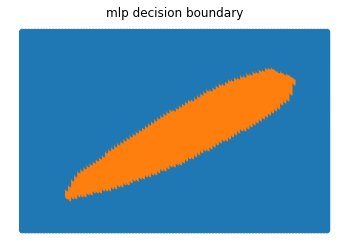

(testing) Epoch 6's' Accuracy: 83.14%


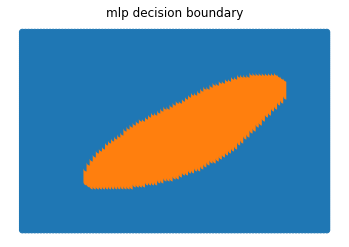

(testing) Epoch 11's' Accuracy: 93.43%


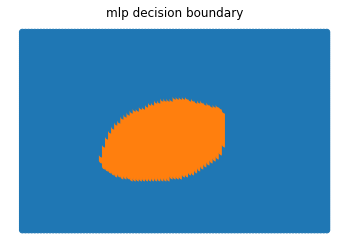

(testing) Epoch 16's' Accuracy: 93.57%


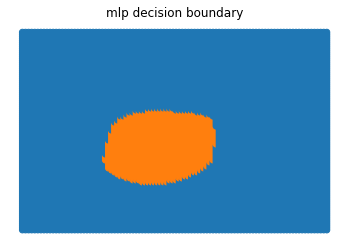

(testing) Epoch 21's' Accuracy: 94.43%


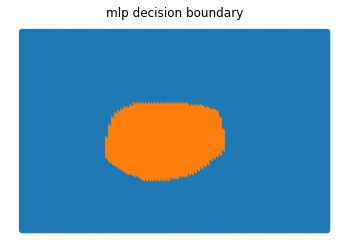

(testing) Epoch 26's' Accuracy: 94.29%


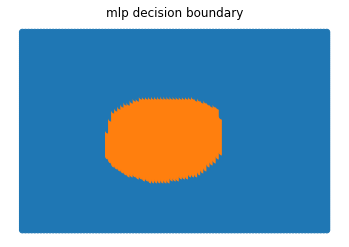

(testing) Epoch 31's' Accuracy: 91.86%


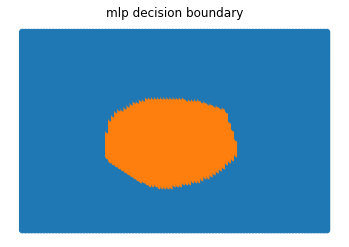

(testing) Epoch 36's' Accuracy: 93.43%


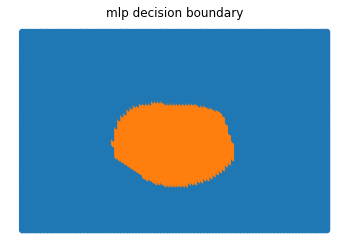

In [13]:
# model & traning

data_loader = torch.utils.data.DataLoader(
    list(zip(X, y))[:train_sample], batch_size=batch_size, shuffle=True, drop_last=True
)

acc = []
# counter=0
for epoch in range(epochs):
    step_num_mlp+=1
    running_loss = 0

    for xs, ys in data_loader:
        opt.zero_grad()

        loss_evaluated = loss(model(xs), ys)
        loss_evaluated.backward()

        opt.step()
    
    accuracy = test(model, X[train_sample:], y[train_sample:], logits=True)
    acc.append(accuracy)

    if epoch %5 == 0:
        print(f"(testing) Epoch {step_num_mlp}'s' Accuracy: {accuracy * 100:.2f}%")
        decision_boundary(model, scale=np.pi, name='mlp decision boundary')

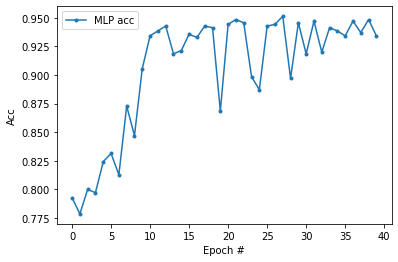

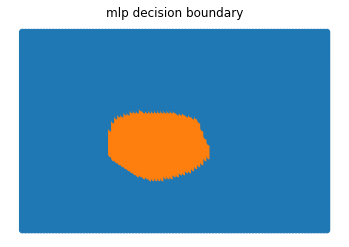

In [14]:
# plot the training result

fig, ax = plt.subplots(1, 1, figsize=(6, 4))

ax.plot(acc, '.-', label="MLP acc")
# ax.plot(*, '.-', label="Backprop")
ax.set_ylabel("Acc")
ax.set_xlabel("Epoch #")
ax.legend()

plt.show()

decision_boundary(model, scale=np.pi, name='mlp decision boundary', logits=True)

For reference, For reference.below is the benchmark in original paper. 

Hybrid multi layer perceptron
=======================================

![title](img/classification_hmlp.png)

In [15]:
import pennylane as qml
import numpy as np
import torch
from torch.autograd import Variable

In [16]:
# defining quantum circuit

n_qubits = 4
dev = qml.device("default.qubit", wires=n_qubits)

@qml.qnode(dev, interface="torch")
def qnode(inputs, weights):
    qml.RX(inputs[0], wires=0)
    qml.RX(inputs[1], wires=2)
    qml.RZ(inputs[0], wires=0)
    qml.RZ(inputs[1], wires=2)
    
    qml.CNOT(wires=[0, 1])
    qml.CNOT(wires=[1, 2])
    qml.CNOT(wires=[2, 3])
    qml.CNOT(wires=[3, 0])
    
    qml.RY(weights[0, 0], wires=0)
    qml.RY(weights[0, 1], wires=1)
    qml.RY(weights[0, 2], wires=2)
    qml.RY(weights[0, 3], wires=3)
    
    qml.CNOT(wires=[0, 1])
    qml.CNOT(wires=[1, 2])
    qml.CNOT(wires=[2, 3])

    # kronecker product
    # https://pennylane.readthedocs.io/en/stable/introduction/measurements.html
    # measurement = qml.expval(qml.PauliZ(1) @ qml.PauliZ(3))
    # return measurement
    return [qml.expval(qml.PauliZ(1)), qml.expval(qml.PauliZ(3))]

In [17]:
# torch layer convert radian to degree
class fan_out(torch.nn.Module):
    def forward(self, x):
        return [x, x]

In [18]:
import functools
from collections import OrderedDict

# hybrid circuits, sequential model
fc_1 = torch.nn.Linear(2, 2, bias=False)
fc_2 = torch.nn.Linear(2, 1)
relu = torch.nn.ReLU()
tanh = torch.nn.Tanh()
sigmoid = torch.nn.Sigmoid()

# pennylane cirtuit convertion, to pytorch layer
n_layers = 1
weight_shapes = {"weights": (n_layers, n_qubits)}
# qlayer = qml.qnn.TorchLayer(qnode, weight_shapes)
qlayer = qml.qnn.TorchLayer(qnode, weight_shapes, init_method={'weights': functools.partial(torch.nn.init.uniform_, b=np.pi*0.6)})
# qlayer = qml.qnn.TorchLayer(qnode, weight_shapes, init_method={'weights': functools.partial(torch.nn.init.normal_, mean=np.pi)})
# qlayer = qml.qnn.TorchLayer(qnode, weight_shapes, init_method={'weights': functools.partial(torch.nn.init.constant_, val=1.4)})

# weight initialization, overwrite default initialization
torch.nn.init.xavier_uniform_(fc_1.weight)
torch.nn.init.xavier_uniform_(fc_2.weight)
torch.nn.init.zeros_(fc_2.bias)

# h_layers = [qlayer, fc_1, relu, fc_2]
# h_layers = [R2D(), qlayer, Add(torch.tensor(0.5)), fc_1, relu, fc_2]
h_layers = OrderedDict(([
            ('qlayer', qlayer),
            # ('fan_out', fan_out()),
            # ('fc_1', fc_1), 
            # ('relu', relu), 
            ('fc_2', fc_2)]))
h_model = torch.nn.Sequential(h_layers)

tensor([1.9390, 2.3328])
Parameter containing:
tensor([[0.9522, 1.7869, 0.2581, 0.9299]], requires_grad=True)
tensor([0.3316, 0.2546], grad_fn=<ToCopyBackward0>)


[0.33161861 0.25461979]


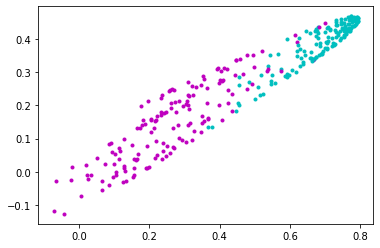

In [19]:
# this block of code is for double checking the qnode work properly

# for param in h_model.qlayer.parameters():
#     param.requires_grad =False

sca = 1
def plot_feature_map():
    for i in range(train_sample):
        feature = test_circuit([X[i,0] * sca, X[i,1] * sca], para)
        # feature = [feature, feature]
        if y[i] == 0:
            plt.plot(feature[0], feature[1], 'mo',markersize=3)
        if y[i] == 1:
            plt.plot(feature[0], feature[1], 'co',markersize=3)
            
# test_measurement_model = torch.nn.Sequential(qlayer, fan_out())
test_measurement_model = torch.nn.Sequential(qlayer)
print(X[0])

for parameter in test_measurement_model.parameters():
    print(parameter)
    para = parameter.detach()
print(test_measurement_model(X[0]))

print('\n')
dev_test = qml.device("default.qubit", wires=n_qubits)

# re-definition, for clean build quantum circuit
@qml.qnode(dev_test)
def test_circuit(inputs, weights):
    qml.RX(inputs[0], wires=0)
    qml.RX(inputs[1], wires=2)
    qml.RZ(inputs[0], wires=0)
    qml.RZ(inputs[1], wires=2)
    
    qml.CNOT(wires=[0, 1])
    qml.CNOT(wires=[1, 2])
    qml.CNOT(wires=[2, 3])
    qml.CNOT(wires=[3, 0])
    
    qml.RY(weights[0, 0], wires=0)
    qml.RY(weights[0, 1], wires=1)
    qml.RY(weights[0, 2], wires=2)
    qml.RY(weights[0, 3], wires=3)
    
    qml.CNOT(wires=[0, 1])
    qml.CNOT(wires=[1, 2])
    qml.CNOT(wires=[2, 3])

    # kronecker product
    # https://pennylane.readthedocs.io/en/stable/introduction/measurements.html
    # measurement = qml.expval(qml.PauliZ(1) @ qml.PauliZ(3))
    # return measurement
    return [qml.expval(qml.PauliZ(1)), qml.expval(qml.PauliZ(3))]

# para = torch.tensor([[0, np.pi, np.pi, 0]], dtype=torch.float32)
# print(test_circuit(torch.tensor([0,0], dtype=torch.float32), para))
print(test_circuit(X[0].detach(), para))
plot_feature_map()


In [20]:
# set up the optimizer
opt = torch.optim.Adam(h_model.parameters(), lr=0.01)
loss = torch.nn.BCEWithLogitsLoss()

In [21]:
# parameter count check
count = 0
for parameter in h_model.parameters():
    count+=1
    print(parameter.size())
print(count)

torch.Size([1, 4])
torch.Size([1, 2])
torch.Size([1])
3


In [22]:
# model and training

batches = total_sample // batch_size

data_loader = torch.utils.data.DataLoader(
    list(zip(X, y))[:train_sample], batch_size=batch_size, shuffle=True, drop_last=True
)

h_acc = []

# optimization begins
for n in range(epoch):
    step_num_hmlp+=1
    for xs, ys in data_loader:
        opt.zero_grad()

        loss_evaluated = loss(h_model(xs), ys)
        loss_evaluated.backward()

        opt.step()

    accuracy = test(h_model, X[train_sample:], y[train_sample:], logits=True)
    print(f"epoch {step_num_hmlp}'s Accuracy: {accuracy * 100:.2f}%")
    # if (step_num_hmlp%10==0):
    #     decision_boundary(h_model, scale=np.pi, name='hybrid mlp decision boundary')
    h_acc.append(accuracy)

epoch 1's Accuracy: 64.71%
epoch 2's Accuracy: 74.00%
epoch 3's Accuracy: 79.86%
epoch 4's Accuracy: 83.29%
epoch 5's Accuracy: 83.14%
epoch 6's Accuracy: 84.86%
epoch 7's Accuracy: 87.29%
epoch 8's Accuracy: 86.57%
epoch 9's Accuracy: 87.29%
epoch 10's Accuracy: 89.29%
epoch 11's Accuracy: 89.57%
epoch 12's Accuracy: 89.57%
epoch 13's Accuracy: 89.71%
epoch 14's Accuracy: 90.00%
epoch 15's Accuracy: 89.86%
epoch 16's Accuracy: 90.14%
epoch 17's Accuracy: 90.43%
epoch 18's Accuracy: 90.14%
epoch 19's Accuracy: 90.14%
epoch 20's Accuracy: 90.29%
epoch 21's Accuracy: 90.43%
epoch 22's Accuracy: 91.00%
epoch 23's Accuracy: 91.00%
epoch 24's Accuracy: 91.00%
epoch 25's Accuracy: 91.00%
epoch 26's Accuracy: 90.86%
epoch 27's Accuracy: 91.00%
epoch 28's Accuracy: 91.00%
epoch 29's Accuracy: 91.14%
epoch 30's Accuracy: 91.00%
epoch 31's Accuracy: 91.00%
epoch 32's Accuracy: 91.00%
epoch 33's Accuracy: 91.00%
epoch 34's Accuracy: 91.00%
epoch 35's Accuracy: 91.00%
epoch 36's Accuracy: 91.14%
e

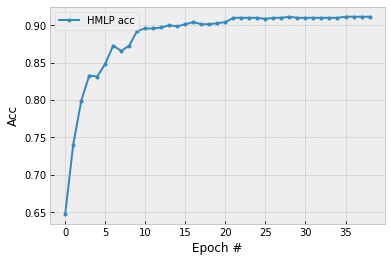

In [23]:
# plot training result

plt.style.use("bmh")

fig, ax = plt.subplots(1, 1, figsize=(6, 4))

ax.plot(h_acc, '.-', label="HMLP acc")
# ax.plot(*, '.-', label="Backprop")
ax.set_ylabel("Acc")
ax.set_xlabel("Epoch #")
ax.legend()

plt.show()

# decision_boundary(h_model, name='hybrid mlp decision boundary')

Comparision
=======================================

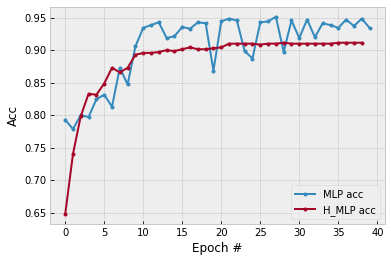

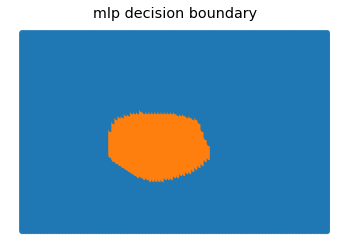

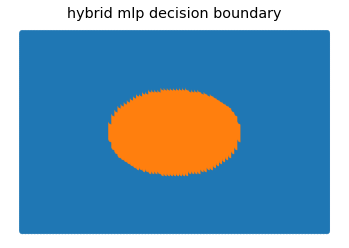

In [24]:
# plot benchmark comparing between mlp and hmlp

plt.style.use("bmh")

fig, ax = plt.subplots(1, 1, figsize=(6, 4))

ax.set_ylabel("Acc")
ax.set_xlabel("Epoch #")

ax.plot(acc, '.-', label="MLP acc")
ax.plot(h_acc, '.-', label="H_MLP acc")
# ax.plot(*, '.-', label="Backprop")
ax.set_ylabel("Acc")
ax.set_xlabel("Epoch #")

ax.legend()
plt.show()

decision_boundary(model, scale=np.pi,name='mlp decision boundary', logits=True)
decision_boundary(h_model, scale=np.pi,name='hybrid mlp decision boundary', logits=True)

For reference, For reference.below is the benchmark in original paper. 

![title](img/classification_comparision.png)